In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
not_Post = pd.read_csv("notPost.csv")

In [3]:
post = pd.read_csv("Post.csv")

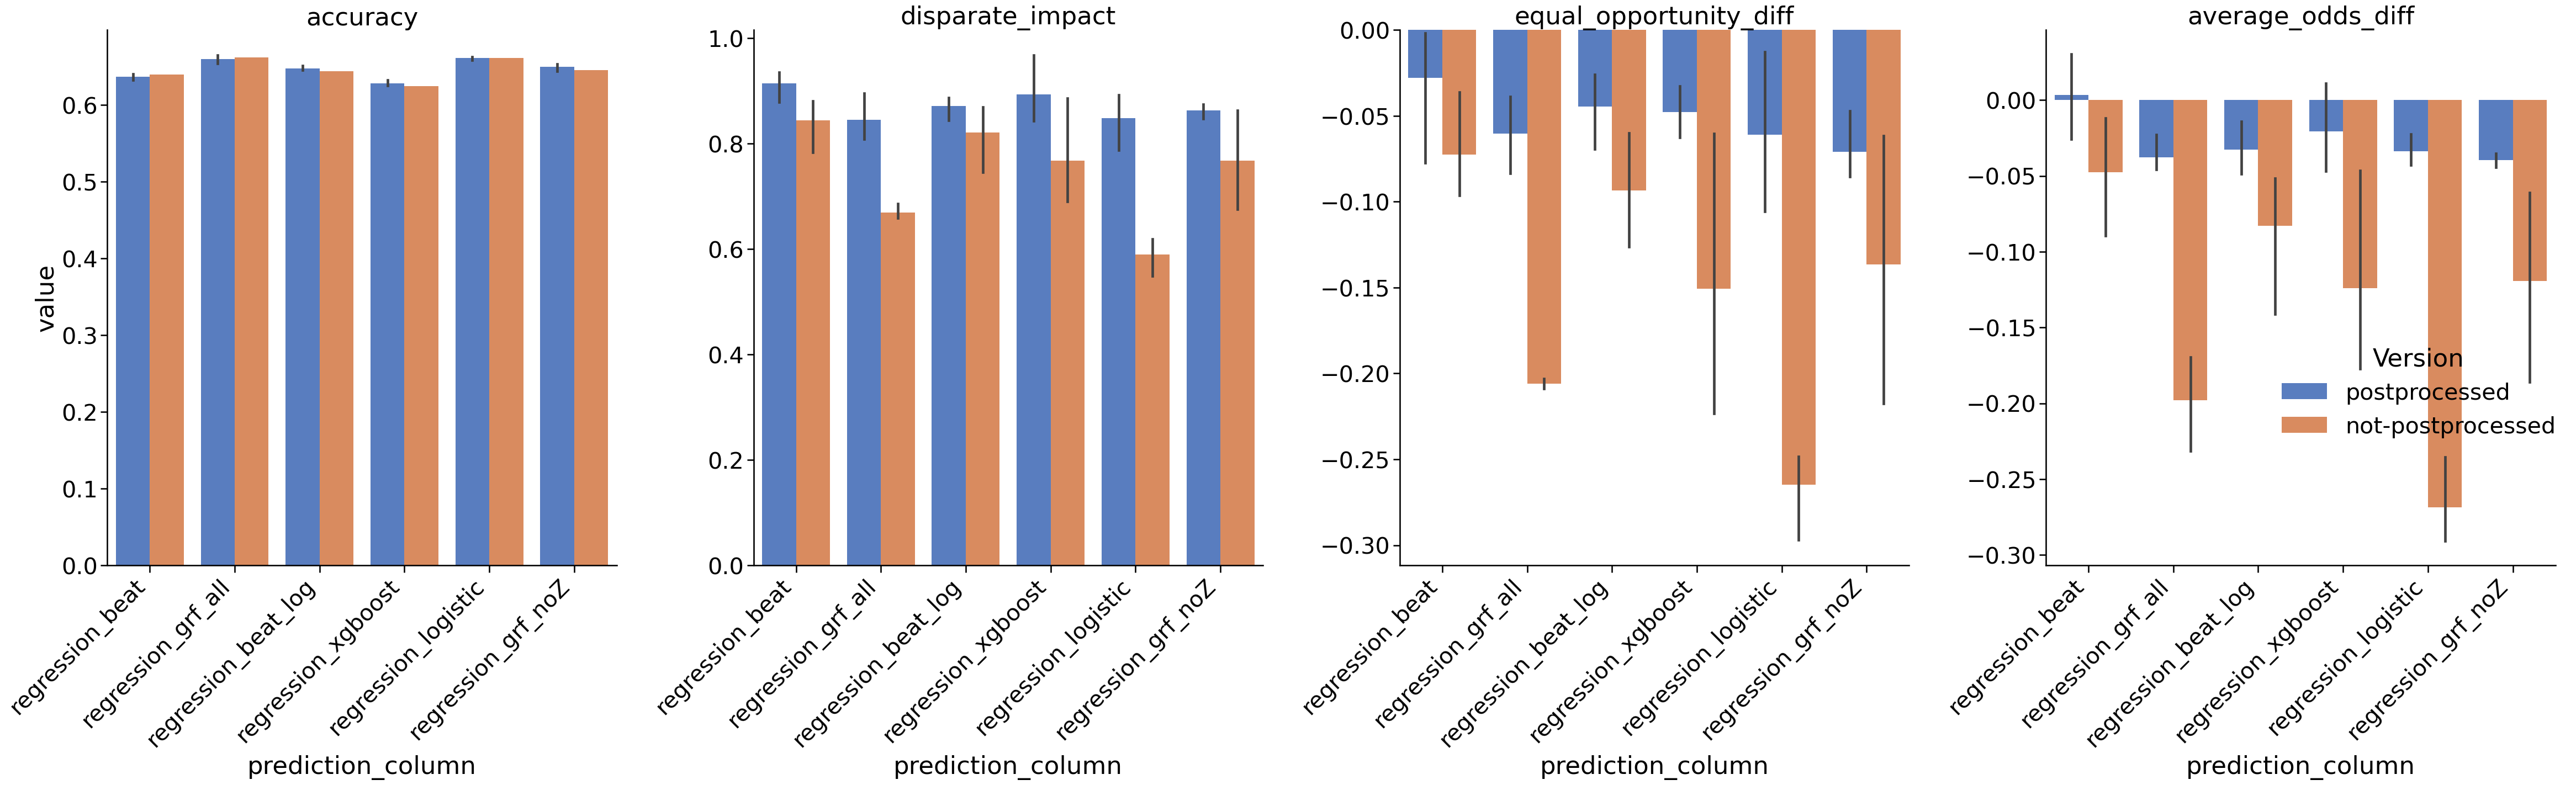

In [18]:


# Increase overall context settings; "talk" is one level larger, and you can adjust the scaling further.
sns.set_context("talk", font_scale=1.8)

# Create the DataFrame as before.
df_all = pd.concat([post, not_Post], ignore_index=True)

# Melt the DataFrame into long format for multiple metrics.
metrics = ['accuracy', 'disparate_impact', 'equal_opportunity_diff', 'average_odds_diff']
df_long = df_all.melt(id_vars=['prediction_column', 'version'],
                      value_vars=metrics,
                      var_name='metric',
                      value_name='value')

# Create a facet grid: one subplot for each metric.
g = sns.FacetGrid(df_long, col="metric", sharey=False, height=15, aspect=0.7)
g.map_dataframe(sns.barplot, x="prediction_column", y="value", hue="version", palette="muted")
g.add_legend(title="Version")
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.set_titles("{col_name}")

# Remove borders on the bars.
for ax in g.axes.flat:
    for patch in ax.patches:
        patch.set_linewidth(0)

plt.tight_layout()
plt.show()

